## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler

In [3]:
df_full = pd.read_csv("data\kc_house_data.csv")

In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df_full.loc[[3910]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3910,9808700762,6/11/2014,7060000.0,5,4.5,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.65,-122.214,3930,25449


In [ ]:
prestige = sqft_living/sqft_living15
           sqft_lot/sqft_lot15
           

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
df = df_full[['id', 'sqft_lot', 'sqft_living',
                    'grade', 'condition', 'sqft_basement'
                    , 'bathrooms', 'bedrooms',
                    'date', 'waterfront', 'price']]

df_loc = df_full[['lat', 'long', 'price']]

fig = px.scatter_mapbox(df_loc, lat='lat', lon='long',          zoom=7, height = 600)

fig.update_layout(mapbox_style='open-street-map')
fig.show()

### row 3910

In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    0.0
21596    0.0
Name: waterfront, Length: 21597, dtype: float64

In [8]:
df.sqft_basement

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object

In [9]:
df.query('sqft_basement == "?"')
df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value= 0)

<ipython-input-9-5fe6c552b2ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value= 0)


In [10]:
df.date

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [11]:

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

<ipython-input-11-85a8bf9ddb6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')


In [12]:
df.grade.value_counts(normalize=True)

7     0.415521
8     0.280826
9     0.121082
6     0.094365
10    0.052507
11    0.018475
5     0.011205
12    0.004121
4     0.001250
13    0.000602
3     0.000046
Name: grade, dtype: float64

In [13]:
df.grade = df.grade.apply(lambda x: x-3)
df.grade

C:\Users\saif.000\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0        4
1        4
2        3
3        4
4        5
        ..
21592    5
21593    5
21594    4
21595    5
21596    4
Name: grade, Length: 21597, dtype: int64

In [14]:
df_clean = df
realprice = pd.DataFrame.copy(df['price'])

In [15]:
df[['sqft_lot', 'sqft_living', 'price']] = np.log(df[['sqft_lot', 'sqft_living', 'price']])

#df['sqft_lot'] = np.log(df['sqft_lot'])
#df['sqft_living'] = np.log(df['sqft_living'])
#df['price'] = np.log(df['price'])

C:\Users\saif.000\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
df

,id,sqft_lot,sqft_living,grade,condition,sqft_basement,bathrooms,bedrooms,date,waterfront,price
0,7129300520,8.639411,7.073270,4,3,0.0,1.00,3,2014-10-13,NaN,12.309982
1,6414100192,8.887653,7.851661,4,3,400.0,2.25,3,2014-12-09,0.0,13.195614
2,5631500400,9.210340,6.646391,3,3,0.0,1.00,2,2015-02-25,0.0,12.100712
3,2487200875,8.517193,7.580700,4,5,910.0,3.00,4,2014-12-09,0.0,13.311329
4,1954400510,8.997147,7.426549,5,3,0.0,2.00,3,2015-02-18,0.0,13.142166
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,7.030857,7.333023,5,3,0.0,2.50,3,2014-05-21,0.0,12.793859
21593,6600060120,8.667852,7.745003,5,3,0.0,2.50,4,2015-02-23,0.0,12.899220
21594,1523300141,7.207860,6.927558,4,3,0.0,0.75,2,2014-06-23,0.0,12.904459
21595,291310100,7.778211,7.377759,5,3,0.0,2.50,3,2015-01-16,NaN,12.899220


In [17]:
#zip_dummies = pd.get_dummies(df['zipcode'], prefix='zipcode', drop_first=True)

grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
cond_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)
    

df = df.drop([ 'grade', 'condition' ], axis=1)

df = df.drop(['id', 'date'], axis= 1)

df = pd.concat([df, grade_dummies, cond_dummies  ], axis=1)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_lot       21597 non-null  float64
 1   sqft_living    21597 non-null  float64
 2   sqft_basement  21597 non-null  object 
 3   bathrooms      21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   waterfront     19221 non-null  float64
 6   price          21597 non-null  float64
 7   grade_1        21597 non-null  uint8  
 8   grade_2        21597 non-null  uint8  
 9   grade_3        21597 non-null  uint8  
 10  grade_4        21597 non-null  uint8  
 11  grade_5        21597 non-null  uint8  
 12  grade_6        21597 non-null  uint8  
 13  grade_7        21597 non-null  uint8  
 14  grade_8        21597 non-null  uint8  
 15  grade_9        21597 non-null  uint8  
 16  grade_10       21597 non-null  uint8  
 17  cond_2         21597 non-null  uint8  
 18  cond_3

In [19]:
price_log = df.price
price_log = pd.DataFrame(price_log)

In [20]:
price_log

,price
0,12.309982
1,13.195614
2,12.100712
3,13.311329
4,13.142166
...,...
21592,12.793859
21593,12.899220
21594,12.904459
21595,12.899220


In [21]:
scaler = StandardScaler()
scalerp = StandardScaler()
df[['sqft_living', 'sqft_lot', 'sqft_basement', 'bedrooms', 'bathrooms']] = scaler.fit_transform(df[['sqft_living', 'sqft_lot', 'sqft_basement', 'bedrooms', 'bathrooms']])

df['price'] = scalerp.fit_transform(price_log)


In [22]:
df.waterfront = df.waterfront.fillna(0)

In [23]:
X = df.drop('price', 1)
y =df['price']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
y.head()

0   -1.402030
1    0.279945
2   -1.799472
3    0.499710
4    0.178438
Name: price, dtype: float64

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17277 entries, 6243 to 15795
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_lot       17277 non-null  float64
 1   sqft_living    17277 non-null  float64
 2   sqft_basement  17277 non-null  float64
 3   bathrooms      17277 non-null  float64
 4   bedrooms       17277 non-null  float64
 5   waterfront     17277 non-null  float64
 6   grade_1        17277 non-null  uint8  
 7   grade_2        17277 non-null  uint8  
 8   grade_3        17277 non-null  uint8  
 9   grade_4        17277 non-null  uint8  
 10  grade_5        17277 non-null  uint8  
 11  grade_6        17277 non-null  uint8  
 12  grade_7        17277 non-null  uint8  
 13  grade_8        17277 non-null  uint8  
 14  grade_9        17277 non-null  uint8  
 15  grade_10       17277 non-null  uint8  
 16  cond_2         17277 non-null  uint8  
 17  cond_3         17277 non-null  uint8  
 18  con

In [27]:
predictors = sm.add_constant(X_train)
model = sm.OLS(y_train , predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1257.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:45:21   Log-Likelihood:                -16788.
No. Observations:               17277   AIC:                         3.362e+04
Df Residuals:                   17256   BIC:                         3.378e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5537      0.657     -0.842      0.400      -1.842       0.735
sqft_lot         -0.0895      0.006    -16.223      0.000      -0.100      -0.079
sqft_living       0.3607      0.011     32.018      0.000       0.339       0.383
sqft_basement     0.0887      0.006     15.607      0.000       0.078       0.100
bathrooms        -0.0186      0.008     -2.269      0.023      -0.035      -0.003
bedrooms         -0.0529      0.007     -7.878      0.000      -0.066      -0.040
waterfront        1.2031      0.060     20.094      0.000       1.086       1.320
grade_1          -0.6064      0.657     -0.923      0.356      -1.894       0.681
grade_2          -0.4236      0.642     -0.660      0.509      -1.682       0.834
grade_3          -0.2150      0.640     -0.336      0.737      -1.470       1.040
grade_4           0.0728      0.640      0.114      0.910      -1.183       1.328
grade_5           0.4545      0.641      0.709      0.478      -0.801       1.710
grade_6           0.9584      0.641      1.495      0.135      -0.298       2.215
grade_7           1.3900      0.641      2.167      0.030       0.133       2.647
grade_8           1.8420      0.642      2.868      0.004       0.583       3.101
grade_9           2.3152      0.646      3.584      0.000       1.049       3.581
grade_10          3.1850      0.670      4.751      0.000       1.871       4.499
cond_2           -0.0325      0.157     -0.206      0.837      -0.341       0.276
cond_3            0.1087      0.148      0.734      0.463      -0.181       0.399
cond_4            0.2663      0.148      1.798      0.072      -0.024       0.557
cond_5            0.5068      0.149      3.406      0.001       0.215       0.798
==============================================================================
Omnibus:                       18.311   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.373
Skew:                           0.079   Prob(JB):                     0.000102
Kurtosis:                       2.984   Cond. No.                         707.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
X_train

,sqft_lot,sqft_living,sqft_basement,bathrooms,bedrooms,waterfront,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,cond_2,cond_3,cond_4,cond_5
6243,-0.556551,-0.656140,-0.649637,-0.150626,0.676687,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8986,0.228514,-0.672568,0.009739,-0.475738,-0.402903,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9419,-0.523926,1.166643,-0.649637,0.824709,0.676687,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
10155,-0.157592,0.187988,1.260280,0.499597,0.676687,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
10436,-0.749346,0.644360,1.214806,-0.150626,-0.402903,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.359391,0.374926,-0.649637,0.499597,-0.402903,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
21575,-0.813094,0.886136,-0.649637,0.824709,0.676687,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5390,0.127681,-0.513218,-0.649637,-0.800849,0.676687,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
860,0.693970,-3.796843,-0.649637,-1.776184,-2.562083,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [30]:
features = X_train
label = y_train

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
            model_1, 
            features,
            label,
            cv=8,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
            model_1, 
            X_test,
            y_test,
            cv=8,
            scoring="neg_mean_squared_error"
)

rmse_scores2 = np.sqrt(-scores)

In [33]:
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([0.65544322, 0.65051318, 0.6206901 , 0.65373863, 0.62570391,
       0.64454765, 0.62593924, 0.64590371])

0.6403099547850553

0.01307426640588488

In [34]:
display(rmse_scores2)
display(rmse_scores2.mean())
display(rmse_scores2.std())

array([0.64077241, 0.67240961, 0.663069  , 0.63080234, 0.64066432,
       0.60416629, 0.64483805, 0.64759279])

0.6430393507645012

0.019233458033196774

In [35]:
df = pd.DataFrame(df)

In [36]:
df

,sqft_lot,sqft_living,sqft_basement,bathrooms,bedrooms,waterfront,price,grade_1,grade_2,grade_3,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,cond_2,cond_3,cond_4,cond_5
0,-0.388439,-1.125582,-0.649637,-1.451073,-0.402903,0.0,-1.402030,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.113243,0.709463,0.259847,0.174486,-0.402903,0.0,0.279945,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.244481,-2.131943,-0.649637,-1.451073,-1.482493,0.0,-1.799472,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,-0.523926,0.070676,1.419440,1.149821,0.676687,0.0,0.499710,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.008140,-0.292732,-0.649637,-0.150626,-0.402903,0.0,0.178438,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-2.171645,-0.513218,-0.649637,0.499597,-0.402903,0.0,-0.483060,0,0,0,...,1,0,0,0,0,0,0,1,0,0
21593,-0.356909,0.458017,-0.649637,0.499597,0.676687,0.0,-0.282961,0,0,0,...,1,0,0,0,0,0,0,1,0,0
21594,-1.975424,-1.469095,-0.649637,-1.776184,-1.482493,0.0,-0.273012,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21595,-1.343145,-0.407754,-0.649637,0.499597,-0.402903,0.0,-0.282961,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [37]:
y_hat = model_1.predict(df.drop('price', 1))
y_hat

array([-0.75278412, -0.0650402 , -1.40307313, ..., -0.67153018,
       -0.06297991, -0.64902577])

In [38]:
y_hat = scalerp.inverse_transform(y_hat)

y_hat = np.exp(y_hat)
y_hat

array([312336.99854668, 448634.81486489, 221778.21212916, ...,
       325989.89729611, 449121.76987506, 329875.70254184])

In [39]:
y_hat

array([312336.99854668, 448634.81486489, 221778.21212916, ...,
       325989.89729611, 449121.76987506, 329875.70254184])

In [40]:
resids = y_hat - realprice

In [41]:
sns.scatterplot(x=resids['price'], y= realprice)

KeyError: 'price'

In [41]:
resids = pd.DataFrame(resids)

In [57]:
df.loc([3910])

TypeError: unhashable type: 'list'

In [42]:
resids

,price
0,11711.658163
1,1081.849115
2,55317.040544
3,-15847.284390
4,-40595.007304
...,...
21592,182796.608992
21593,23890.225641
21594,-54374.372482
21595,6296.562322


In [51]:
resids.min()

price   -2.396828e+06
dtype: float64

<AxesSubplot:ylabel='Count'>

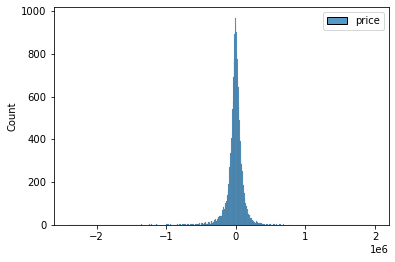

In [49]:
sns.histplot(resids)

In [45]:
df_full.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool